# Configuration notebook

In [ ]:
# import des libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8, 6)
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import scipy as sp
from urllib import request
import scipy.stats as st

# Importation et préparation des données

### customers

In [ ]:
# Chargement des donnees customers
url_customers = ("https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_4/data/customers.csv")
customers = pd.read_csv(url_customers)
customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [ ]:
# Visualisation tendances centrales
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [ ]:
# recherche valeurs manquantes
customers.isnull().values.any()

False

In [ ]:
# recherche valeurs manquantes
customers.isna().values.any()

False

* il n'y a pas de valeurs nulles ou manquantes

In [ ]:
# recherche client_id anormales 
customers.sort_values(["client_id"], axis=0, ascending=False, inplace=True)
customers.head(5)

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


* identification de 2 clients test ct_1 & ct_0

In [ ]:
##Suppression CT
customers = customers.set_index("client_id")
customers = customers.drop("ct_1", axis=0)
customers = customers.drop("ct_0", axis=0)

In [ ]:
# recherche client_id anormales
customers.sort_values(["client_id"], axis=0, ascending=True, inplace=True)
customers.head(5)

,sex,birth
client_id,,
c_1,m,1955
c_10,m,1956
c_100,m,1992
c_1000,f,1966
c_1001,m,1982


* Plus d'anomalies client_id

In [ ]:
# Table sexe pour recherche anomalies
pd.crosstab(index = customers["sex"], columns="count")

col_0,count
sex,
f,4490
m,4131


* Pas d'anomalies sex

In [ ]:
# indexation customers
customers = customers.reset_index()

### products

In [ ]:
# Chargement des donnees products
url_products = ("https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_4/data/products.csv")
products = pd.read_csv(url_products)
products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
# exploration données
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
id_prod    3287 non-null object
price      3287 non-null float64
categ      3287 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
# recherche valeurs manquantes
products.isna().values.any()

False

* Pas de valeurs nulles ou Na's dans table products

In [ ]:
# recherche id_prod aberrantes
products.sort_values(["id_prod"], axis=0, ascending=False, inplace=True)
products.head(5)

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2


* T_0 produit test -> a supprimer 

In [ ]:
# suppression produit T_O
products = products.set_index("id_prod")
products = products.drop("T_0", axis=0)
products.sort_values(["id_prod"], axis=0, ascending=False, inplace=True)
products.head(5)

,price,categ
id_prod,,
2_99,84.99,2
2_98,149.74,2
2_97,160.99,2
2_96,47.91,2
2_95,98.99,2


* T_0 supprimé

In [ ]:
# exploration tendances centrales
products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [ ]:
#indexation table products
products = products.reset_index()

### transactions

In [ ]:
# Chargement des donnees transactions
url_transactions = ("https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_4/data/transactions.csv")
transactions = pd.read_csv(url_transactions)
transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [ ]:
##Suppression CT
transactions = transactions.set_index("client_id")
transactions = transactions.drop("ct_1", axis=0)
transactions = transactions.drop("ct_0", axis=0)

In [ ]:
# exploration données 
transactions.info()
transactions.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 336816 entries, c_4450 to c_6714
Data columns (total 3 columns):
id_prod       336816 non-null object
date          336816 non-null object
session_id    336816 non-null object
dtypes: object(3)
memory usage: 10.3+ MB


,id_prod,date,session_id
count,336816,336816,336816
unique,3265,336816,169194
top,1_369,2022-01-07 21:37:13.043139,s_118668
freq,1081,1,14


* Pas de valeurs nulles

In [ ]:
# recherche données manquantes ou abberantes
transactions.isna().values.any()

False

* Pas de Na's dans transactions

In [ ]:
# recherche id_prod manquantes ou abberantes
list_prod = products['id_prod'].unique()
prod_err = []

In [ ]:
def check_id_prod(id_prod):
    if id_prod not in list_prod:
        prod_err.append(id_prod)
    return id_prod

transactions['id_prod'] = transactions['id_prod'].apply(check_id_prod)

def unique(prod_err): 
    x = np.array(prod_err) 
    print(np.unique(x))
    
unique(prod_err)

['0_2245']


* id_prod 0_2245 inconnu
* Imputation  0_2245 non disponible pour imputation par moyenne -> moyenne categ 0

In [ ]:
### Calcul moyenne prix categ 0
moy_categ_0 = round(np.mean(products.price[products.categ == 1]),1) #25.5
moy_categ_0

25.5

In [ ]:
# imputation prix moyen catégorie 0 au produit 0_2245
products = products.append({'id_prod' : '0_2245', 'price' : moy_categ_0 , 'categ' : 0}, ignore_index=True)

In [ ]:
#recherche client_id abbrantes
transactions = transactions.reset_index()

list_client = customers['client_id'].unique()
client_err = []

def check_id_client(client_id):
    if client_id not in list_client:
        client_err.append(client_id)
    return client_id

transactions['client_id'] = transactions['client_id'].apply(check_id_client)

def unique(client_err): 
    x = np.array(client_err) 
    print(np.unique(x))
    
unique(client_err)

[]


* aucun code client inconnu

In [ ]:
# Correctif format date
transactions = transactions.reset_index()

def first(string):
    parts = string.split(' ')
    first_part = parts[0]
    return first_part

transactions['date']=transactions['date'].apply(first)

# Analyse descriptive

In [ ]:
# creation variable jour
transactions['date'] = transactions['date'].astype('datetime64[ns]')
transactions['jour'] = transactions.date.dt.weekday_name

In [ ]:
## Préparation merge price
price=products[["id_prod","price"]]

## Merge price
transactions = pd.merge(transactions,price,left_on= "id_prod", right_on= "id_prod")

In [ ]:
## préparation merge sex
sex=customers[["sex","client_id"]]

##Merge sex
transactions= pd.merge(transactions,sex,left_on="client_id", right_on="client_id")

In [ ]:
## préparation merge age
customers["age"]=2020-customers.birth
age=customers[["age","client_id"]]

#Merge age
transactions= pd.merge(transactions,age,left_on="client_id", right_on="client_id")

In [ ]:
#Ajout du mois
transactions['date'] = transactions['date'].astype('datetime64[ns]')
transactions['mois'] = pd.DatetimeIndex(transactions['date']).month

In [ ]:
transactions['client_id'].value_counts().head(10)
# c_1609 + c_6714 + c_3454 + c_4958 = outliers = mise de coté pour la suite

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_7959      195
c_2140      195
c_8026      193
c_2595      193
c_3725      190
c_8392      189
Name: client_id, dtype: int64

* identifications de clients pro ou institutionnels (c_1609 + c_6714 + c_3454 + c_4958)

In [ ]:
# calcul réprésentation clients pro dans CA
list_pro = ("c_1609", "12855" , "c_6714" , "c_3454",  "c_4958")

client_pro = transactions.loc[transactions["client_id"].isin(list_pro)] 
print(client_pro.price.sum())
print((client_pro.price.sum())/(transactions.price.sum()))

434006.81
0.07483902787235322


* clients pro ou institutionnels représentent 434006.81 € de CA soit 7% du CA.

In [ ]:
# correctif = suppression client pro
transactions = transactions[~transactions.client_id.isin(list_pro)] 

## CA

In [ ]:
# calcul CA par date
ca_jour=transactions[["price","date"]]
ca_jour.reset_index(inplace = True, drop = True)
ca_jour= ca_jour.groupby(["date"]).sum()
ca_jour.head(5)

,price
date,
2021-03-01,15345.17
2021-03-02,14434.99
2021-03-03,13602.03
2021-03-04,13418.64
2021-03-05,15918.13


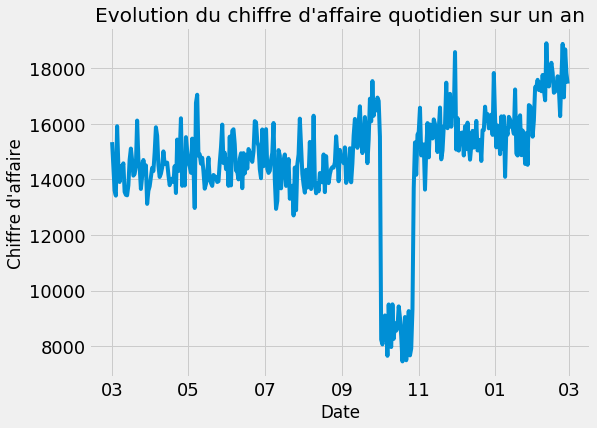

In [ ]:
fig = plt.figure()
ax = plt.axes()
x = ca_jour.price
plt.title("Evolution du chiffre d'affaire quotidien sur un an")
plt.ylabel("Chiffre d'affaire")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel("Date")
ax.plot(x)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)


In [ ]:
# Set index
ca_jour = ca_jour.reset_index()
ca_jour = ca_jour.set_index(ca_jour['date'])

# Sélection observations entre 2 dates 
ca_jour_octobre = ca_jour.loc['2021-10-01':'2021-10-31']


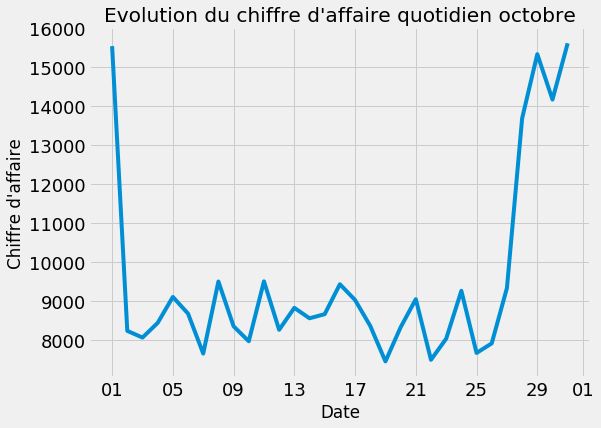

In [ ]:
fig = plt.figure()
ax = plt.axes()
x = ca_jour_octobre.price
plt.title("Evolution du chiffre d'affaire quotidien octobre")
plt.ylabel("Chiffre d'affaire")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xlabel("Date")
ax.plot(x)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

* chute anormale du 2 au 27 octobre

In [ ]:
## préparation merge categ
categ = products[["id_prod","categ"]]

##Merge categ
transactions=pd.merge(transactions,categ,left_on="id_prod",right_on="id_prod")

# Set index
transactions = transactions.set_index(transactions['date'])

# Select observations between two datetimes
transactions_octobre = transactions.loc['2021-10-02':'2021-10-27']
transactions_octobre.head(5)

,index,client_id,id_prod,date,session_id,jour,price,sex,age,mois,categ
date,,,,,,,,,,,
2021-10-18,1215,c_1576,0_1483,2021-10-18,s_106741,Monday,4.99,m,64,10,0
2021-10-19,17929,c_309,0_1483,2021-10-19,s_107057,Tuesday,4.99,f,63,10,0
2021-10-03,74151,c_7406,0_1483,2021-10-03,s_99408,Sunday,4.99,m,32,10,0
2021-10-09,82583,c_4211,0_1483,2021-10-09,s_102441,Saturday,4.99,m,33,10,0
2021-10-21,83808,c_7250,0_1483,2021-10-21,s_108164,Thursday,4.99,m,42,10,0


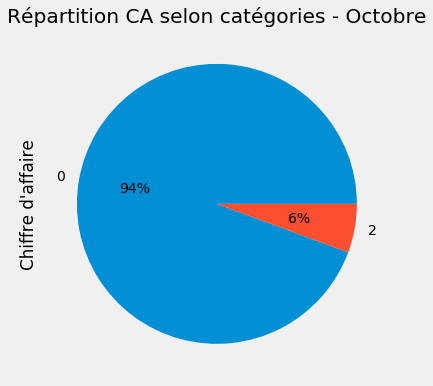

In [ ]:
transactions_octobre['categ'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.ylabel("")
plt.title("Répartition CA selon catégories - Octobre")
plt.ylabel("Chiffre d'affaire")
plt.show()

* Disparition catégorie 0

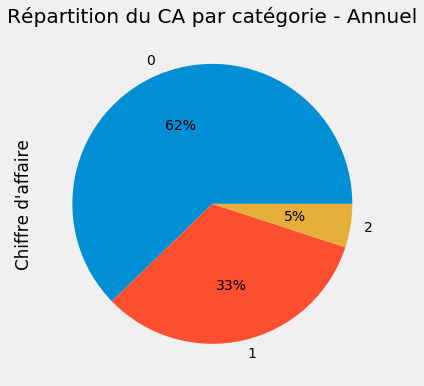

In [ ]:
transactions['categ'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.ylabel("")
plt.title("Répartition du CA par catégorie - Annuel")
plt.ylabel("Chiffre d'affaire")
plt.show()

* En comparaison catégorie 1 = 33% achats sur l'année complète

In [ ]:
# nombre de produit categ 1 
products.categ.value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

* 739 produits en categ 1
* problème technique ou opération commerciale ?
* dans le doute le choix est de retirer tout le mois d'octobre 

In [ ]:
# Suppression période octobre
start_date = '2021-10-01'
end_date = '2021-10-31'


mask = (transactions['date'] < start_date) | (transactions['date'] > end_date)

transactions = transactions.loc[mask]

In [ ]:
# graphique CA corrigé
ca_jour=transactions[["price","date"]]
ca_jour.reset_index(inplace = True, drop = True)
ca_jour= ca_jour.groupby(["date"]).sum()

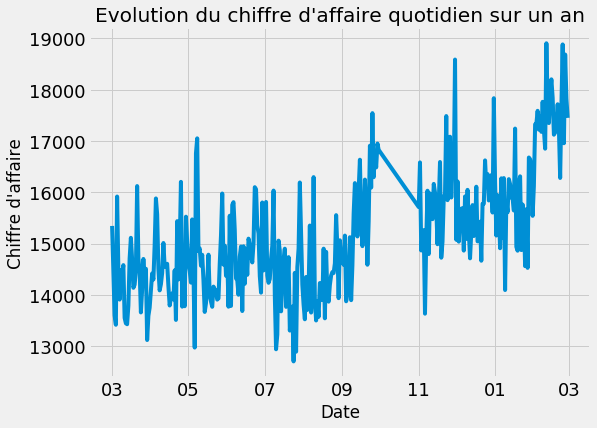

In [ ]:
fig = plt.figure()
ax = plt.axes()
x = ca_jour.price
plt.title("Evolution du chiffre d'affaire quotidien sur un an")
plt.ylabel("Chiffre d'affaire")
plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.plot(x)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

In [ ]:
##CA journalier
ca_jour=transactions[["price","jour"]]
ca_jour= ca_jour.groupby(["jour"]).sum()
ca_jour = ca_jour.reset_index()
ca_jour['jour'] = ca_jour['jour'].astype(object)

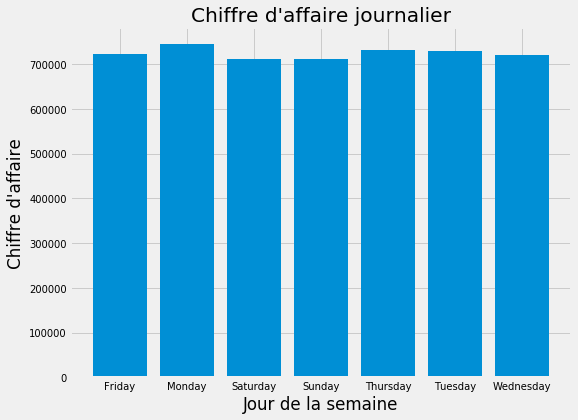

In [ ]:
# Graphique CA journalier
fig = plt.figure()
ax = plt.axes()
y = ca_jour.price
x = ca_jour.jour
plt.title("Chiffre d'affaire journalier")
plt.ylabel("Chiffre d'affaire")
plt.xlabel("Jour de la semaine")
ax.bar(x,y)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

plt.show()

In [ ]:
## CA mensuel moyen
ca_jour["price"].mean()

724254.3442855749

* CA journalier moyen = 724254

In [ ]:
##CA par sexe
ca_sex =transactions[["sex","price"]]
ca_sex= ca_sex.groupby(["sex"]).sum()
ca_sex = ca_sex.reset_index()

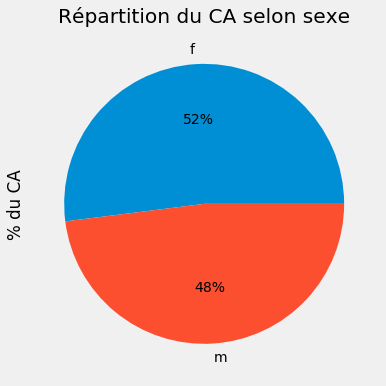

In [ ]:
# Graphique CA selon sexe
labels = ca_sex.sex
ca_sex['price'].plot(kind='pie', autopct='%1.0f%%',labels=labels)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Répartition du CA selon sexe")
plt.ylabel("% du CA")
plt.show()

In [ ]:
##Panier moyen
panier=transactions[["session_id","price"]]
panier=panier.groupby(["session_id"]).sum()

panier = panier.reset_index()
panier.describe()

,price
count,147046.000000
mean,34.477513
std,31.674836
min,0.620000
25%,15.810000
50%,25.990000
75%,43.277500
max,539.230000


* Panier moyen = 34.5
* Panier médian = 26
* min = 0.62
* max = 539

In [ ]:
## CA annuel moyen

ca_clients=transactions[["client_id","price"]]
ca_clients=ca_clients.groupby(["client_id"]).sum()
ca_clients = ca_clients.reset_index()
ca_clients.describe()

,price
count,8594.000000
mean,589.920923
std,432.420405
min,4.150000
25%,260.947500
50%,475.585000
75%,822.362500
max,2450.000000


* CA annuel moyen par client = 589
* CA annuel media par client = 475
* CA annuel mini = 4.15
* CA annuel max = 2450

## Clients

In [ ]:
# nombre clients
len(customers)

8621

* 8621 clients

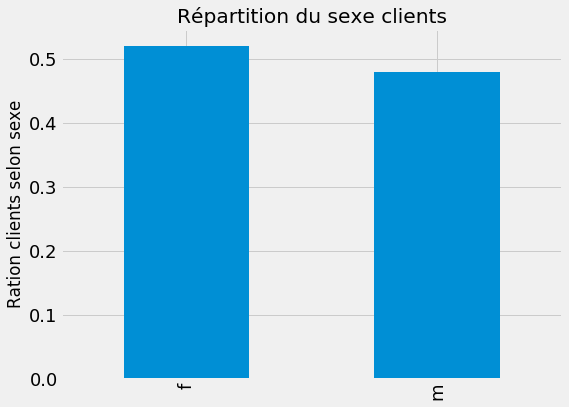

In [ ]:
## Graphique Répartition clients selon sexe
customers['sex'].value_counts(normalize=True).plot(kind='bar')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Répartition du sexe clients")
plt.ylabel("Ration clients selon sexe")
plt.show()

In [ ]:
#Fréquence achats par utilisateur 
freq=transactions[["client_id","session_id"]]
freq['client_id'].value_counts().describe()

count    8594.000000
mean       34.164301
std        31.205225
min         1.000000
25%        13.000000
50%        24.000000
75%        44.000000
max       184.000000
Name: client_id, dtype: float64

* 34 achats par an en moyenne
* 50% 13-44 achats
* max = 184

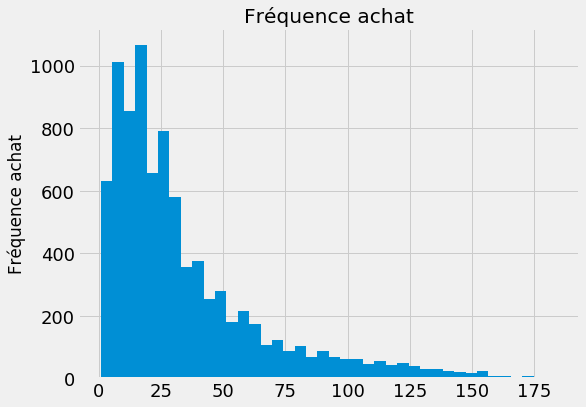

In [ ]:
# graphique distribution fréquence achats
freq['client_id'].value_counts().plot(kind='hist', bins = 40)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Fréquence achat")
plt.ylabel("Fréquence achat")
plt.show()

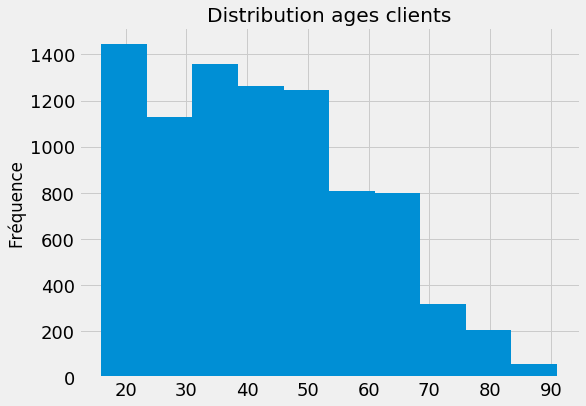

In [ ]:
customers['age'].plot(kind='hist')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Distribution ages clients")
plt.ylabel("Fréquence")
plt.show()

In [ ]:
#CONCENTRATION AGE CLIENT
dep = customers["age"]
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

0.23

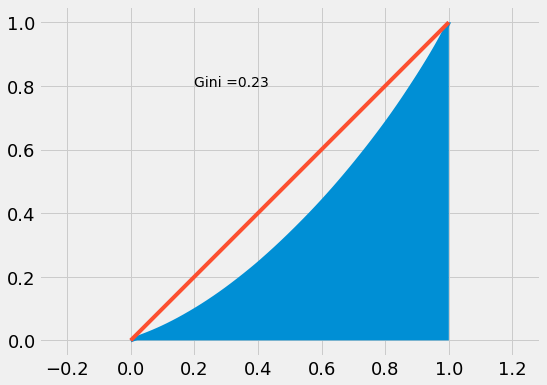

In [ ]:
#Graphique

plt.axes().axis('equal')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.show()

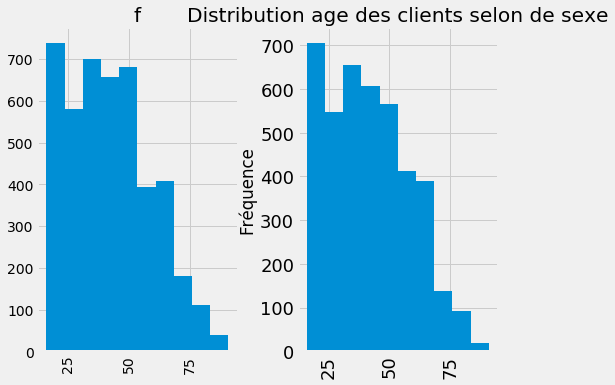

In [ ]:
# Graphique Distribution age des clients selon de sexe

customers['age'].hist(by=customers['sex'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Distribution age des clients selon de sexe")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
# Montant du panier
session_sex = transactions[["session_id","sex"]]
panier = pd.merge(session_sex,panier, left_on="session_id", right_on="session_id")

Text(0, 0.5, '')

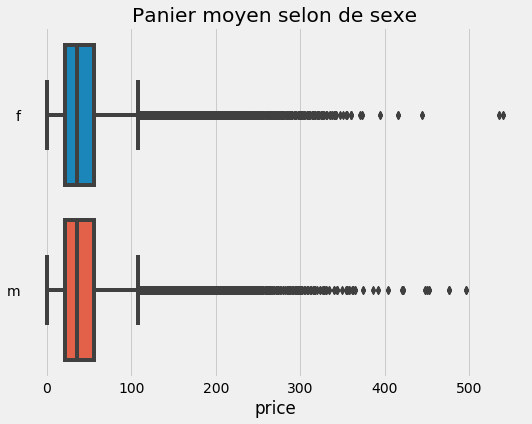

In [ ]:
# graphique montant panier moyen
sns.boxplot( y=panier["sex"], x=panier["price"] )
plt.title("Panier moyen selon de sexe")
plt.ylabel("Montant du panier")
plt.ylabel("")


## Produits

In [ ]:
## Nb produits
len(products) #3287

3287

* 3287 produits référencés

In [ ]:
## Tendances centrales Prix
products["price"].describe()

count    3287.000000
mean       21.864703
std        29.845311
min         0.620000
25%         6.990000
50%        13.090000
75%        22.990000
max       300.000000
Name: price, dtype: float64

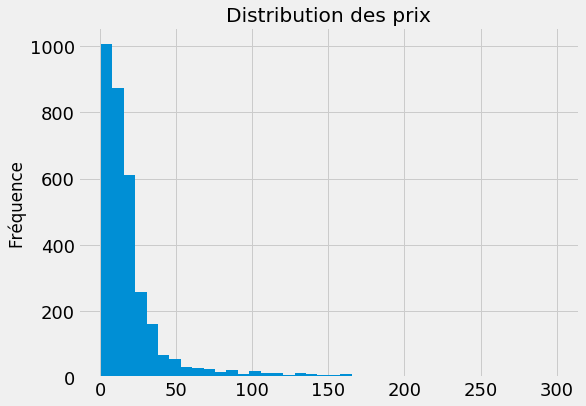

In [ ]:
# Graphique distribution prix
products['price'].hist(bins=40)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Distribution des prix")
plt.ylabel("Fréquence")
plt.show()

In [ ]:
## CONCENTRATION PRIX (Lorenz)
dep = products["price"]
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

0.53

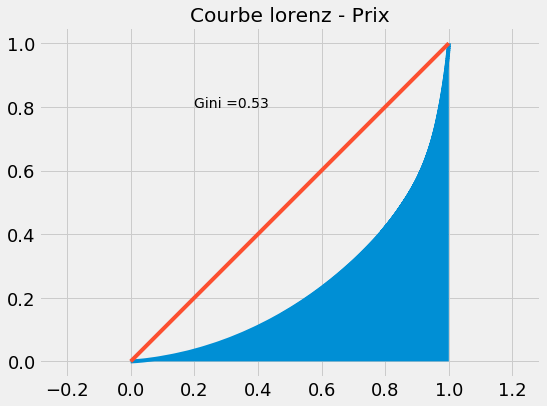

In [ ]:
#Graphique concentration des prix

plt.axes().axis('equal')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.title("Courbe lorenz - Prix")
plt.show()

Text(0, 0.5, 'Prix')

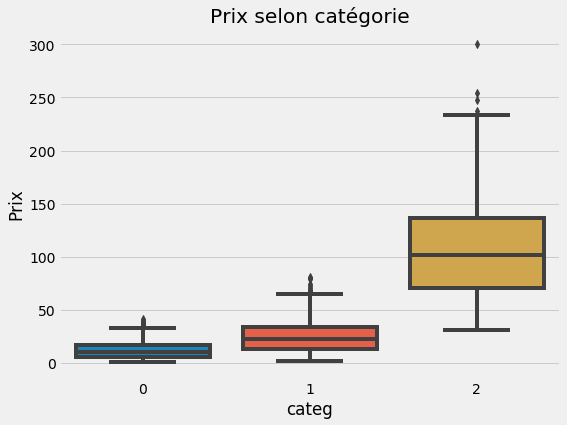

In [ ]:
# Graphique selon catégorie
sns.boxplot( x=products["categ"], y=products["price"] )
plt.title("Prix selon catégorie")
plt.ylabel("Prix")

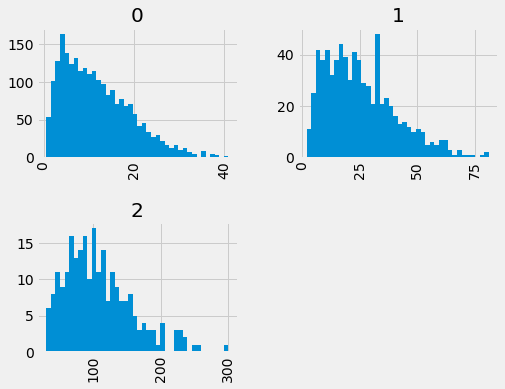

In [ ]:
#  Graphique distribution prix par catégorie
products['price'].hist(bins=40, by=products["categ"])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title("Distribution prix par catégorie")
plt.ylabel("Fréquence")
plt.show()

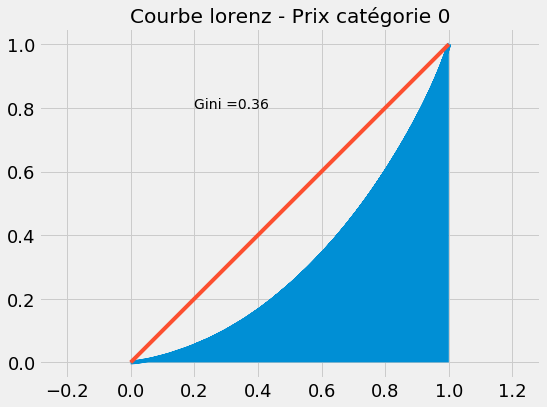

In [ ]:
##Lorenz prix categ 0
products_0 = products[products.categ==0]
dep = products_0["price"]
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

#Graphique

plt.axes().axis('equal')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.title("Courbe lorenz - Prix catégorie 0")
plt.show()

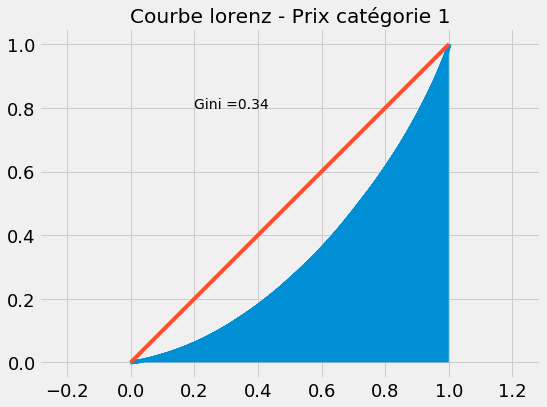

In [ ]:
##Lorenz prix categ 1
products_1 = products[products.categ==1]
dep = products_1["price"]
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

#Graphique

plt.axes().axis('equal')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.title("Courbe lorenz - Prix catégorie 1")
plt.show()

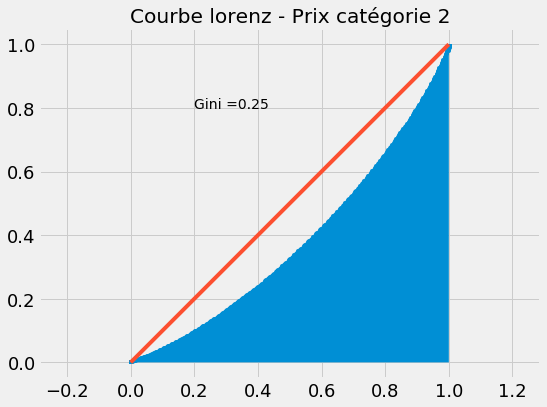

In [ ]:
##Lorenz prix categ 2
products_2 = products[products.categ==2]
dep = products_2["price"]
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

#Graphique

plt.axes().axis('equal')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.title("Courbe lorenz - Prix catégorie 2")
plt.show()

Text(0, 0.5, 'Prix')

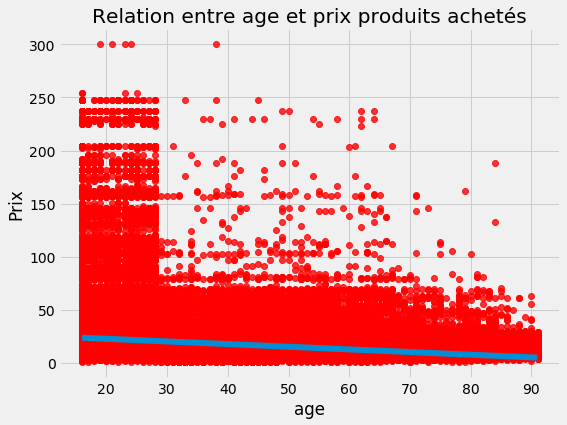

In [ ]:
# Graphique relation age prix produits
sns.regplot(y=transactions["price"], x=transactions["age"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre age et prix produits achetés")
plt.ylabel("Prix")



In [ ]:
# TOP 10 produit + vendu
transactions['id_prod'].value_counts().head(10)

1_369    1003
1_417     981
1_414     953
1_498     946
1_425     931
1_413     883
1_398     875
1_412     873
1_406     873
1_407     866
Name: id_prod, dtype: int64

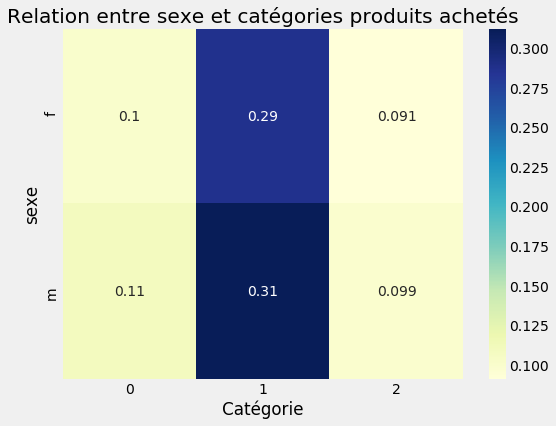

In [ ]:
##Heatmap sex / categ

X = "sex"
Y = "categ"

cont = transactions[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transactions)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="YlGnBu")
plt.title("Relation entre sexe et catégories produits achetés")
plt.ylabel("sexe")
plt.xlabel("Catégorie")
plt.show()

In [ ]:
# calcult eta_squared
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print(eta_squared(transactions["sex"],transactions["categ"]))

5.9064785534026885e-06


* eta² = 5.9064785534026885e-06

In [ ]:
# Relation age et CA cummulé
ca_age=transactions[["client_id","price"]]
ca_age=ca_age.groupby(["client_id"]).sum()
ca_age = ca_age.reset_index()

In [ ]:
# création table age 
age=customers[["client_id","age"]]


In [ ]:
# merge par age
ca_age=pd.merge(ca_age,age,left_on="client_id", right_on="client_id")


Text(0.5, 0, 'Age')

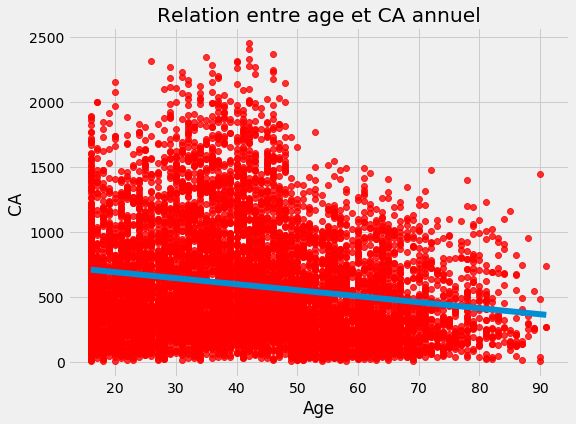

In [ ]:
# Relation age et CA cummulé
sns.regplot(y=ca_age["price"], x=ca_age["age"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre age et CA annuel")
plt.ylabel("CA")
plt.xlabel("Age")

In [ ]:
print(st.pearsonr(ca_age["price"], ca_age["age"])[0])
print(np.cov(ca_age["price"], ca_age["age"],ddof=0)[1,0])


-0.18094920787890612
-1323.112390933589


* Pearson = -0.18094920787890612

In [ ]:
import statsmodels.api as sm

x = ca_age[["price"]]
y = ca_age["age"]

model = sm.OLS(y, x)
results = model.fit()
print(results.pvalues)

price    0.0
dtype: float64


* p < 0.05

In [ ]:
##Calcul décenie
ca_age["diz"]=round(ca_age.age,-1)

In [ ]:
# calcul CA par décénnier
ca_age=ca_age.groupby(["diz"]).sum()
ca_age = ca_age.reset_index()

Text(0.5, 0, 'Décennie')

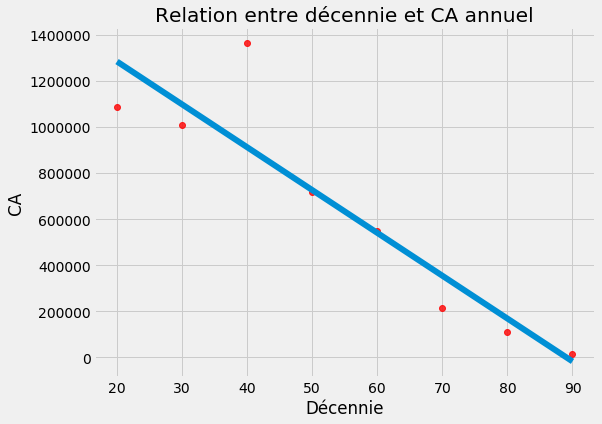

In [ ]:
# Relation diz et CA cummulé
sns.regplot(y=ca_age["price"], x=ca_age["diz"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre décennie et CA annuel")
plt.ylabel("CA")
plt.xlabel("Décennie")

In [ ]:
# Relation diz et CA cummulé
print(st.pearsonr(ca_age["price"], ca_age["diz"])[0])
print(np.cov(ca_age["price"], ca_age["diz"],ddof=0)[1,0])

-0.9171900193801841
-9765010.781249998


* pearson = -0.91

In [ ]:
x = ca_age[["price"]]
y = ca_age["diz"]

model = sm.OLS(y, x)
results = model.fit()

print(results.pvalues)

price    0.136999
dtype: float64


In [ ]:
# frequence achat client 
freq = pd.crosstab(index = transactions["client_id"], columns="count")
freq = pd.merge(freq,age,left_on="client_id", right_on="client_id")

Text(0.5, 0, 'Age')

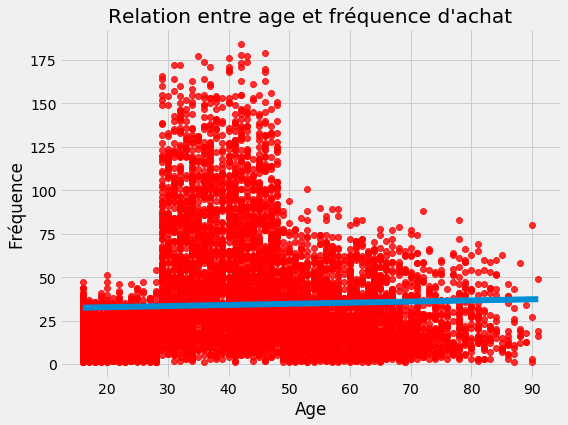

In [ ]:
# Relation age et fréquence achat
sns.regplot(y=freq["count"], x=freq["age"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre age et fréquence d'achat")
plt.ylabel("Fréquence")
plt.xlabel("Age")

In [ ]:
# calcul dizaine 
freq["diz"]=round(freq.age,-1)
freq=freq.groupby(["diz"]).sum()
freq = freq.reset_index()

Text(0.5, 0, 'Décennie')

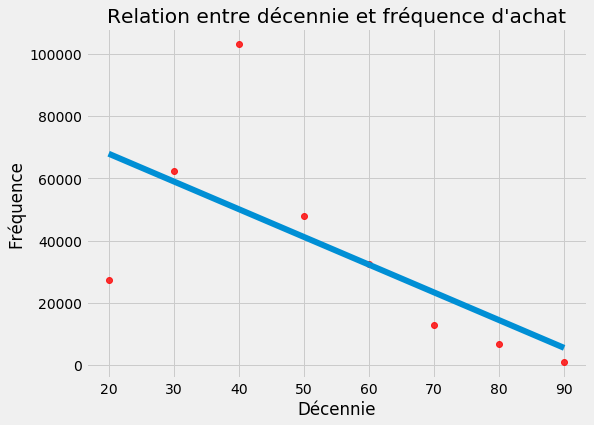

In [ ]:
# Relation diz et fréquence achat
sns.regplot(y=freq["count"], x=freq["diz"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre décennie et fréquence d'achat")
plt.ylabel("Fréquence")
plt.xlabel("Décennie")

In [ ]:
x = freq[["count"]]
y = freq["diz"]

model = sm.OLS(y, x)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.pvalues)

count    0.13648
dtype: float64


In [ ]:
# Selection, regroupement, merge préparation Relation age et panier moyen
session_age = transactions[["session_id","age"]]
session_age = session_age.reset_index()
del session_age['date']
session_age.head(5)

,session_id,age
0,s_18746,43
1,s_119491,36
2,s_69222,40
3,s_41614,40
4,s_79505,40


In [ ]:
# merge 
session_age = pd.merge(session_age,panier, left_on="session_id", right_on="session_id")
session_age = session_age.reset_index()

Text(0.5, 0, 'Panier moyen')

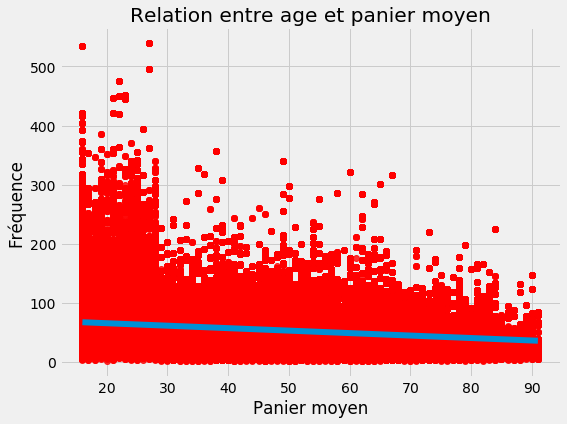

In [ ]:
# Relation age et panier moyen
sns.regplot(y=session_age["price"], x=session_age["age"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre age et panier moyen")
plt.ylabel("Fréquence")
plt.xlabel("Panier moyen")

In [ ]:
##Calcul décenie
session_age["diz"]=round(session_age.age,-1)
session_age=session_age.groupby(["diz"]).sum()
session_age = session_age.reset_index()

Text(0.5, 0, 'Décennie')

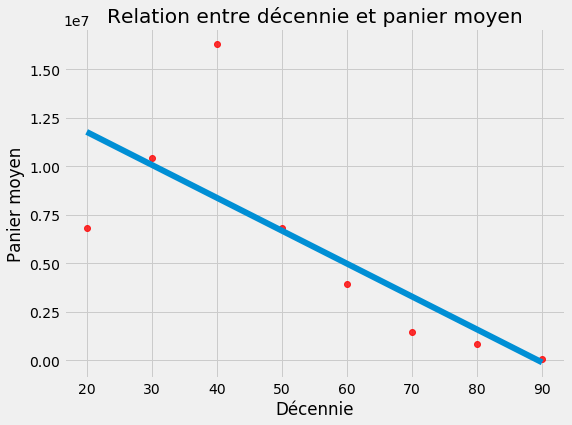

In [ ]:
# Relation diz et panier moyen
sns.regplot(y=session_age["price"], x=session_age["diz"],ci = None,scatter_kws = {"color": "red"})
plt.title("Relation entre décennie et panier moyen")
plt.ylabel("Panier moyen")
plt.xlabel("Décennie")

In [ ]:
x = session_age[["price"]]
y = session_age["diz"]

model = sm.OLS(y, x)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.pvalues)


price    0.170795
dtype: float64


In [ ]:
## Décennier et catégorie
transactions["diz"]=round(transactions.age,-1)

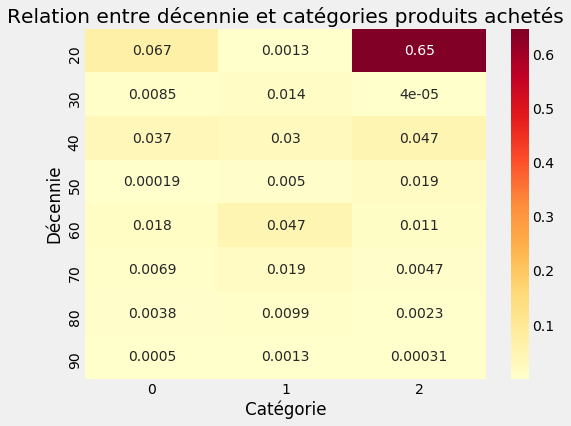

In [ ]:
##Heatmap diz / categ

X = "diz"
Y = "categ"

cont = transactions[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transactions)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="YlOrRd")
plt.title("Relation entre décennie et catégories produits achetés")
plt.ylabel("Décennie")
plt.xlabel("Catégorie")
plt.show()

In [ ]:
eta_squared(transactions["diz"],transactions["categ"])

0.19377895049384705

In [ ]:
##création variable groupe_age
mask = transactions['age'] < 30
transactions.loc[mask, 'groupe_age'] = "Groupe 1"
mask = (transactions['age'] < 50) & (transactions['age'] >= 30)
transactions.loc[mask, 'groupe_age'] = "Groupe 2"
mask = transactions['age'] >= 50
transactions.loc[mask, 'groupe_age'] = "Groupe 3"

transactions['groupe_age'] = transactions['groupe_age'].astype('category')

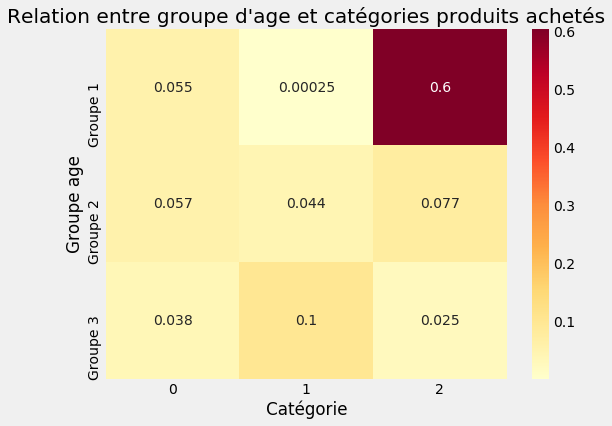

In [ ]:
#heatmap groupe / categ

X = "groupe_age"
Y = "categ"

cont = transactions[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transactions)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="YlOrRd")
plt.title("Relation entre groupe d'age et catégories produits achetés")
plt.ylabel("Groupe age")
plt.xlabel("Catégorie")
plt.show()

In [ ]:
eta_squared(transactions["groupe_age"],transactions["categ"])

0.2036180531957948